# Импорт

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from statannot import add_stat_annotation

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE, SpectralEmbedding, Isomap
from sklearn.decomposition import FastICA, NMF
import scipy, warnings
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

In [4]:
import sys
path_to_GCM = 'D:\\WorkSpace\\git\\Grain_Color_Meter\\'
sys.path.append(path_to_GCM)
from Grain_Color_Meter import Grain_Color_Meter

# Тест функции измерения цвета

In [5]:
path_to_image = 'D:\\WorkSpace\\Jupiter_WorkSpace\\Grain_Color_Meter\\Testing_samples\\Testing_samples'
image_file = '02-1-1.jpg'

In [6]:
image = path_to_image + '\\' + image_file

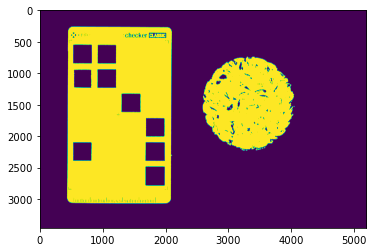

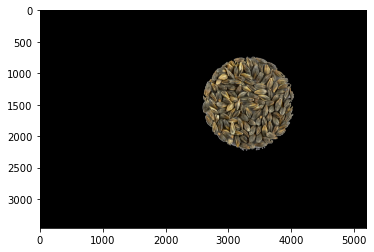

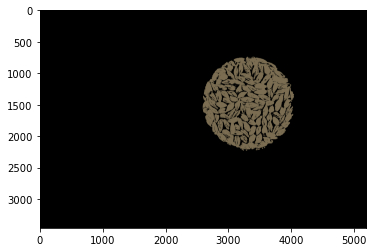

In [7]:
color = Grain_Color_Meter.measure_color(image, preproc_1 = True, preproc_2 = True, res_img='Yes', open_iter=2, bg_iter=4, k=2)

In [8]:
color

[122, 109, 82]

# Загрузка аннотации

In [9]:
annot = pd.read_csv('D:\\WorkSpace\\Jupiter_WorkSpace\\Grain_Color_Meter\\Testing_samples.csv', index_col='Sample_Number')

In [10]:
annot['BLP'].replace(0, 'no', inplace=True)
annot['BLP'].replace(1, 'yes', inplace=True)
annot['Myc2'].replace(0, 'no', inplace=True)
annot['Myc2'].replace(1, 'yes', inplace=True)
annot['Ant2'].replace(0, 'no', inplace=True)
annot['Ant2'].replace(1, 'yes', inplace=True)

In [11]:
annot

,Sample_Name,melanin_hull,melanin_pericarp,ant_pericarp,ant_aleurone,Nud,BLP,Myc2,Ant2
Sample_Number,,,,,,,,,
01,Rec,no,no,no,no,yes,no,no,no
02,BLP-h,yes,yes,no,no,no,yes,no,no
03,BLP-n,no,yes,no,no,yes,yes,no,no
04,Bowman,no,no,no,no,no,no,no,no
05,BA,no,no,no,yes,yes,no,yes,no
...,...,...,...,...,...,...,...,...,...
Wh_34,Dagestanskii,no,no,no,no,no,no,no,no
Wh_35,Krasnoyarskii_1,no,no,no,no,no,no,no,no
Wh_36,Talan,no,no,no,no,no,no,no,no


# Создание списка фотографий

In [12]:
# Создание списка с картинками
pic_dir = 'D:\\WorkSpace\\Jupiter_WorkSpace\\Grain_Color_Meter\\Testing_samples\\Testing_samples'

pics = list(os.walk(pic_dir))[0][2]

#print(pics)

In [13]:
# Удаление json-файлов из списка картинок
for p in pics:
    if p.split('.')[-1] == 'json':
        pics.remove(p)
    if len(p.split('-')) < 3:
        pics.remove(p)
#print(pics)

In [14]:
# Создание словаря, где id образца : все картинки, относящиеся к нему
pic_dict = {}
for p in pics:
    s = p.split('-')[0]
    if s not in pic_dict:
        pic_dict[s] = [p]
    else:
        pic_dict[s].append(p)
#pic_dict

# Измерение цвета и создание словаря цветов

In [107]:
color_dict = {}
mean_r_list, mean_g_list, mean_b_list = [],[],[]
std_r_list, std_g_list, std_b_list = [],[],[]
for sample in annot.index:
    r_list, g_list, b_list = [],[],[]
    for pic in pic_dict[sample]:
        ##### for test #####
#        if pic.split('.')[0][-4:] != '-1-1':
#            continue
        ##### for test #####
        image = pic_dir + '\\' + pic
        color = Grain_Color_Meter.measure_color(image, res_img=None, open_iter=2, bg_iter=4, K=2)
        r_list.append(color[0])
        g_list.append(color[1])
        b_list.append(color[2])
        print(pic)
    mean_r_list.append(sum(r_list) / len(r_list))
    mean_g_list.append(sum(g_list) / len(g_list))
    mean_b_list.append(sum(b_list) / len(b_list))
    std_r_list.append(np.std(r_list))
    std_g_list.append(np.std(g_list))
    std_b_list.append(np.std(b_list))

01-1-1.jpg
01-1-2.jpg
01-1-3.jpg
01-2-1.jpg
01-2-2.jpg
01-2-3.jpg
01-3-1.jpg
01-3-2.jpg
01-3-3.jpg
02-1-1.jpg
02-1-2.jpg
02-1-3.jpg
02-2-1.jpg
02-2-2.jpg
02-2-3.jpg
02-3-1.jpg
02-3-2.jpg
02-3-3.jpg
03-1-1.jpg
03-1-2.jpg
03-1-3.jpg
03-1-4.jpg
03-1-5.jpg
03-1-6.jpg
03-1-7.jpg
03-1-8.jpg
03-1-9.jpg
04-1-1.jpg
04-1-2.jpg
04-1-3.jpg
04-2-1.jpg
04-2-2.jpg
04-2-3.jpg
04-3-1.jpg
04-3-2.jpg
04-3-3.jpg
05-1-1.jpg
05-1-2.jpg
05-1-3.jpg
05-2-1.jpg
05-2-2.jpg
05-2-3.jpg
05-2-4.jpg
05-2-5.jpg
05-2-6.jpg
06-1-1.jpg
06-1-2.jpg
06-1-3.jpg
06-2-1.jpg
06-2-2.jpg
06-2-3.jpg
06-3-1.jpg
06-3-2.jpg
06-3-3.jpg
07-1-1.jpg
07-1-2.jpg
07-1-3.jpg
07-2-1.jpg
07-2-2.jpg
07-2-3.jpg
07-3-1.jpg
07-3-2.jpg
07-3-3.jpg
08-1-1.jpg
08-1-2.jpg
08-1-3.jpg
08-1-4.jpg
08-2-1.jpg
08-2-2.jpg
08-2-3.jpg
08-2-4.jpg
08-2-5.jpg
09-1-1.jpg
09-1-2.jpg
09-1-3.jpg
09-2-1.jpg
09-2-2.jpg
09-2-3.jpg
09-3-1.jpg
09-3-2.jpg
09-3-3.jpg
10-1-1.jpg
10-1-2.jpg
10-1-3.jpg
10-2-1.jpg
10-2-2.jpg
10-2-3.jpg
10-3-1.jpg
10-3-2.jpg
10-3-3.jpg
11-1-1.jpg

Wh_33-3-3.jpg
Wh_34-1-1.jpg
Wh_34-1-2.jpg
Wh_34-1-3.jpg
Wh_34-2-1.jpg
Wh_34-2-2.jpg
Wh_34-2-3.jpg
Wh_34-3-1.jpg
Wh_34-3-2.jpg
Wh_34-3-3.jpg
Wh_35-1-1.jpg
Wh_35-1-2.jpg
Wh_35-1-3.jpg
Wh_35-2-1.jpg
Wh_35-2-2.jpg
Wh_35-2-3.jpg
Wh_35-3-1.jpg
Wh_35-3-2.jpg
Wh_35-3-3.jpg
Wh_36-1-1.jpg
Wh_36-1-2.jpg
Wh_36-1-3.jpg
Wh_36-2-1.jpg
Wh_36-2-2.jpg
Wh_36-2-3.jpg
Wh_36-3-1.jpg
Wh_36-3-2.jpg
Wh_36-3-3.jpg
Wh_37-1-1.jpg
Wh_37-1-2.jpg
Wh_37-1-3.jpg
Wh_37-2-1.jpg
Wh_37-2-2.jpg
Wh_37-2-3.jpg
Wh_37-3-1.jpg
Wh_37-3-2.jpg
Wh_37-3-3.jpg
Wh_38-1-1.jpg
Wh_38-1-2.jpg
Wh_38-1-3.jpg
Wh_38-1-4.jpg
Wh_38-1-5.jpg
Wh_38-2-1.jpg
Wh_38-2-2.jpg
Wh_38-2-3.jpg
Wh_38-2-4.jpg


In [108]:
annot["Red_mean"] = mean_r_list
annot["Green_mean"] = mean_g_list
annot["Blue_mean"] = mean_b_list
annot["Red_std"] = std_r_list
annot["Green_std"] = std_g_list
annot["Blue_std"] = std_b_list

In [110]:
# Запись в csv файл (на всякий случай)
#annot
#annot.to_csv('Annotation_with_colors.csv', index=True)

In [15]:
# Если запускается повторно, можно считать датафрейм из файла и не ждать час, пока он посчитается
annot = pd.read_csv('D:\\WorkSpace\\Jupiter_WorkSpace\\Grain_Color_Meter\\Annotation_with_colors.csv')

# Анализ датафрейма с цветами

## Описательные статистики

In [16]:
annot

,Sample_Number,Sample_Name,melanin_hull,melanin_pericarp,ant_pericarp,ant_aleurone,Nud,BLP,Myc2,Ant2,Color_Raw,Red_mean,Green_mean,Blue_mean,Red_std,Green_std,Blue_std
0,01,Rec,no,no,no,no,yes,0,0,0,"[[181, 132, 49], [180, 131, 49], [181, 131, 49...",182.222222,132.777778,50.444444,1.396645,1.474055,1.571348
1,02,BLP-h,yes,yes,no,no,no,1,0,0,"[[122, 109, 82], [122, 109, 82], [121, 109, 82...",121.444444,108.555556,81.777778,1.706921,1.165343,0.628539
2,03,BLP-n,no,yes,no,no,yes,1,0,0,"[[131, 98, 54], [133, 101, 58], [132, 100, 56]...",130.555556,98.222222,54.555556,1.949992,1.749780,1.571348
3,04,Bowman,no,no,no,no,no,0,0,0,"[[174, 138, 73], [181, 146, 77], [188, 154, 84...",180.333333,144.222222,76.444444,4.594683,5.632796,5.519885
4,05,BA,no,no,no,yes,yes,0,1,0,"[[150, 128, 83], [152, 130, 85], [149, 126, 82...",145.666667,124.222222,81.333333,3.527668,2.739740,1.825742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Wh_34,Dagestanskii,no,no,no,no,no,0,0,0,"[[192, 135, 65], [178, 122, 59], [190, 131, 59...",185.444444,127.666667,59.444444,6.584681,4.690416,2.793290
75,Wh_35,Krasnoyarskii_1,no,no,no,no,no,0,0,0,"[[173, 123, 69], [170, 120, 66], [180, 132, 75...",175.666667,126.777778,71.444444,2.943920,3.705185,3.095197
76,Wh_36,Talan,no,no,no,no,no,0,0,0,"[[182, 136, 78], [182, 135, 77], [174, 127, 71...",179.000000,132.000000,74.888889,4.082483,4.876246,3.348115
77,Wh_37,Aley,no,no,no,no,no,0,0,0,"[[177, 128, 68], [180, 132, 71], [175, 124, 63...",177.222222,127.666667,68.000000,3.325918,4.242641,3.651484


In [17]:
annot.describe()

,BLP,Myc2,Ant2,Red_mean,Green_mean,Blue_mean,Red_std,Green_std,Blue_std
count,79.000000,79.00000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.354430,0.21519,0.202532,154.967651,119.244726,71.690577,2.659298,2.635507,2.415856
std,0.481397,0.41358,0.404454,30.745234,18.667102,11.022146,1.613252,1.611686,1.757323
min,0.000000,0.00000,0.000000,73.000000,64.555556,50.444444,0.737028,0.816497,0.628539
25%,0.000000,0.00000,0.000000,129.333333,108.833333,64.166667,1.405429,1.405429,1.405429
50%,0.000000,0.00000,0.000000,171.777778,124.111111,71.444444,1.949992,2.000000,1.949992
75%,1.000000,0.00000,0.000000,176.611111,127.555556,76.944444,3.651088,3.653061,3.193355
max,1.000000,1.00000,1.000000,189.333333,154.777778,100.555556,7.733206,8.991079,14.149990


In [18]:
# Сводная таблица. Показывает сводную таблицу, в которой для указанного признака (trait) будет приведена информация по 
# среднему значению каждого цвета
trait = 'melanin_pericarp'
annot[[trait,'Red_mean', 'Green_mean', 'Blue_mean']].pivot_table(index=[trait], aggfunc='mean')

,Blue_mean,Green_mean,Red_mean
melanin_pericarp,,,
no,70.503268,128.967320,175.006536
yes,73.853175,101.535714,118.468254


## Графики распределения цветов в зависимости от признаков

In [19]:
annot['BLP'].replace(0, 'no', inplace=True)
annot['BLP'].replace(1, 'yes', inplace=True)
annot['Myc2'].replace(0, 'no', inplace=True)
annot['Myc2'].replace(1, 'yes', inplace=True)
annot['Ant2'].replace(0, 'no', inplace=True)
annot['Ant2'].replace(1, 'yes', inplace=True)
annot['ant_pericarp'].replace(0, 'no', inplace=True)
annot['ant_pericarp'].replace(1, 'yes', inplace=True)
annot['ant_aleurone'].replace(0, 'no', inplace=True)
annot['ant_aleurone'].replace(1, 'yes', inplace=True)

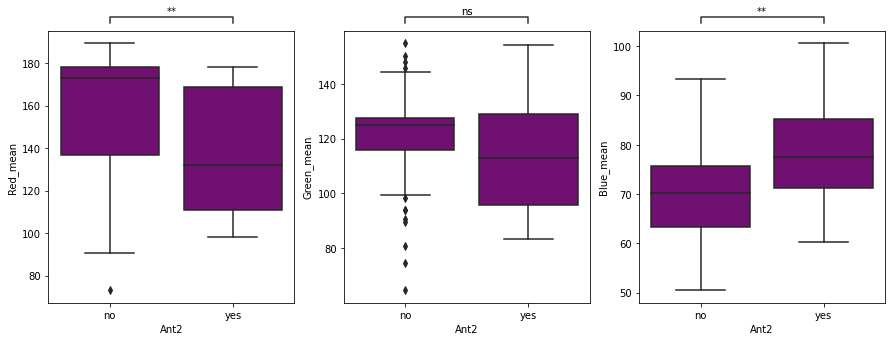

In [20]:
# Boxplot с p-value по каждому цвету для указанного признака

trait = 'Ant2'
color = 'purple' # '#FE5e26'
test = 't-test_ind' # Статистический тест. Возможен также Манн-Уитни, Уилкоксон
text_format = 'star' # Если star, то вместо текста будут звездочки. Если full, будет текст с p-value
verbose = 0 # Если 1, информация о каждом сравнении (p-value, stat) будет выведена на экран

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.boxplot(x = trait, y = 'Red_mean', data = annot, ax = axes[0], color = color)
add_stat_annotation(axes[0], data=annot, x=trait, y='Red_mean',
                    box_pairs=[("no", "yes")],
                    test=test, text_format=text_format, loc='outside', verbose=verbose)
sns.boxplot(x = trait, y = 'Green_mean', data = annot, ax = axes[1], color = color)
add_stat_annotation(axes[1], data=annot, x=trait, y='Green_mean',
                    box_pairs=[("no", "yes")],
                    test=test, text_format=text_format, loc='outside', verbose=verbose)
sns.boxplot(x = trait, y = 'Blue_mean', data = annot, ax = axes[2], color = color)
add_stat_annotation(axes[2], data=annot, x=trait, y='Blue_mean',
                    box_pairs=[("no", "yes")],
                    test=test, text_format=text_format, loc='outside', verbose=verbose)

fig.savefig("Ant2.png", dpi = 600)

### Сравнение зерен с антоцианами, меланинами, и одновременным накоплением антоцианов и меланинов

In [21]:
annot['melanin_hull'].replace('no', 0, inplace=True)
annot['melanin_hull'].replace('yes', 1, inplace=True)
annot['melanin_pericarp'].replace('no', 0, inplace=True)
annot['melanin_pericarp'].replace('yes', 1, inplace=True)
annot['ant_pericarp'].replace('no', 0, inplace=True)
annot['ant_pericarp'].replace('yes', 1, inplace=True)
annot['ant_aleurone'].replace('no', 0, inplace=True)
annot['ant_aleurone'].replace('yes', 1, inplace=True)

In [22]:
annot['pigments'] = ["Mel+Anth" if ((annot.loc[i,'melanin_hull'] + annot.loc[i,'melanin_pericarp'] > 0) 
                         and (annot.loc[i,'ant_pericarp'] + annot.loc[i,'ant_aleurone'] > 0)) 
                     else "Melanins" if (annot.loc[i,'melanin_hull'] + annot.loc[i,'melanin_pericarp'] > 0) 
                     else "Anthocyanins" if (annot.loc[i,'ant_pericarp'] + annot.loc[i,'ant_aleurone'] > 0) 
                     else "None" for i in annot.T]

In [23]:
annot['pigments'].value_counts()

None            40
Melanins        19
Anthocyanins    11
Mel+Anth         9
Name: pigments, dtype: int64

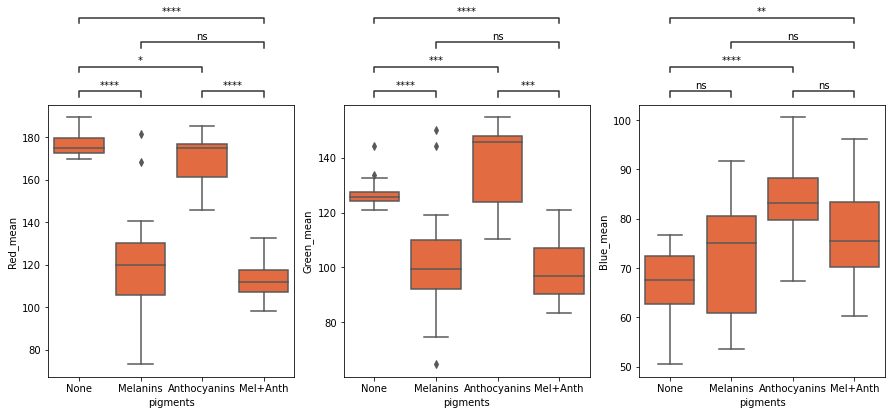

In [24]:
# Boxplot с p-value по каждому цвету для указанного признака

trait = 'pigments'
color = '#FE5e26' # '#FE5e26'
test = 't-test_ind' # Статистический тест. Возможен также Манн-Уитни, Уилкоксон
text_format = 'star' # Если star, то вместо текста будут звездочки. Если full, будет текст с p-value
verbose = 0 # Если 1, информация о каждом сравнении (p-value, stat) будет выведена на экран

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#axes[0].set(ylim=(-1, 6))   

sns.boxplot(x = trait, y = 'Red_mean', data = annot, ax = axes[0], color = color)
add_stat_annotation(axes[0], data=annot, x=trait, y='Red_mean',
                    box_pairs=[("None", "Melanins"), ("None", "Anthocyanins"), ("None", "Mel+Anth"),("Anthocyanins", "Mel+Anth"),("Melanins", "Mel+Anth")],
                    test=test, text_format=text_format, loc='outside', verbose=verbose)
sns.boxplot(x = trait, y = 'Green_mean', data = annot, ax = axes[1], color = color)
add_stat_annotation(axes[1], data=annot, x=trait, y='Green_mean',
                    box_pairs=[("None", "Melanins"), ("None", "Anthocyanins"), ("None", "Mel+Anth"),("Anthocyanins", "Mel+Anth"),("Melanins", "Mel+Anth")],
                    test=test, text_format=text_format, loc='outside', verbose=verbose)
sns.boxplot(x = trait, y = 'Blue_mean', data = annot, ax = axes[2], color = color)
add_stat_annotation(axes[2], data=annot, x=trait, y='Blue_mean',
                    box_pairs=[("None", "Melanins"), ("None", "Anthocyanins"), ("None", "Mel+Anth"),("Anthocyanins", "Mel+Anth"),("Melanins", "Mel+Anth")],
                    test=test, text_format=text_format, loc='outside', verbose=verbose)

fig.savefig("Pigments.png", dpi = 600)

## Корреляция

In [25]:
annot['BLP'].replace('no', 0, inplace=True)
annot['BLP'].replace('yes', 1, inplace=True)
annot['Myc2'].replace('no', 0, inplace=True)
annot['Myc2'].replace('yes', 1, inplace=True)
annot['Ant2'].replace('no', 0, inplace=True)
annot['Ant2'].replace('yes', 1, inplace=True)

In [26]:
annot[['BLP','Myc2','Ant2','melanin_hull','melanin_pericarp','ant_pericarp','ant_aleurone','Red_mean','Green_mean','Blue_mean']].corr(method='pearson')

,BLP,Myc2,Ant2,melanin_hull,melanin_pericarp,ant_pericarp,ant_aleurone,Red_mean,Green_mean,Blue_mean
BLP,1.000000,0.127157,0.219211,0.706699,1.000000,0.219211,0.127157,-0.885254,-0.707420,0.146309
Myc2,0.127157,1.000000,0.732481,0.100569,0.127157,0.732481,1.000000,-0.190341,0.046785,0.440719
Ant2,0.219211,0.732481,1.000000,0.195975,0.219211,1.000000,0.732481,-0.289292,-0.110609,0.348478
melanin_hull,0.706699,0.100569,0.195975,1.000000,0.706699,0.195975,0.100569,-0.620303,-0.407671,0.365409
melanin_pericarp,1.000000,0.127157,0.219211,0.706699,1.000000,0.219211,0.127157,-0.885254,-0.707420,0.146309
ant_pericarp,0.219211,0.732481,1.000000,0.195975,0.219211,1.000000,0.732481,-0.289292,-0.110609,0.348478
ant_aleurone,0.127157,1.000000,0.732481,0.100569,0.127157,0.732481,1.000000,-0.190341,0.046785,0.440719
Red_mean,-0.885254,-0.190341,-0.289292,-0.620303,-0.885254,-0.289292,-0.190341,1.000000,0.891402,-0.001218
Green_mean,-0.707420,0.046785,-0.110609,-0.407671,-0.707420,-0.110609,0.046785,0.891402,1.000000,0.393828
Blue_mean,0.146309,0.440719,0.348478,0.365409,0.146309,0.348478,0.440719,-0.001218,0.393828,1.000000


<AxesSubplot:>

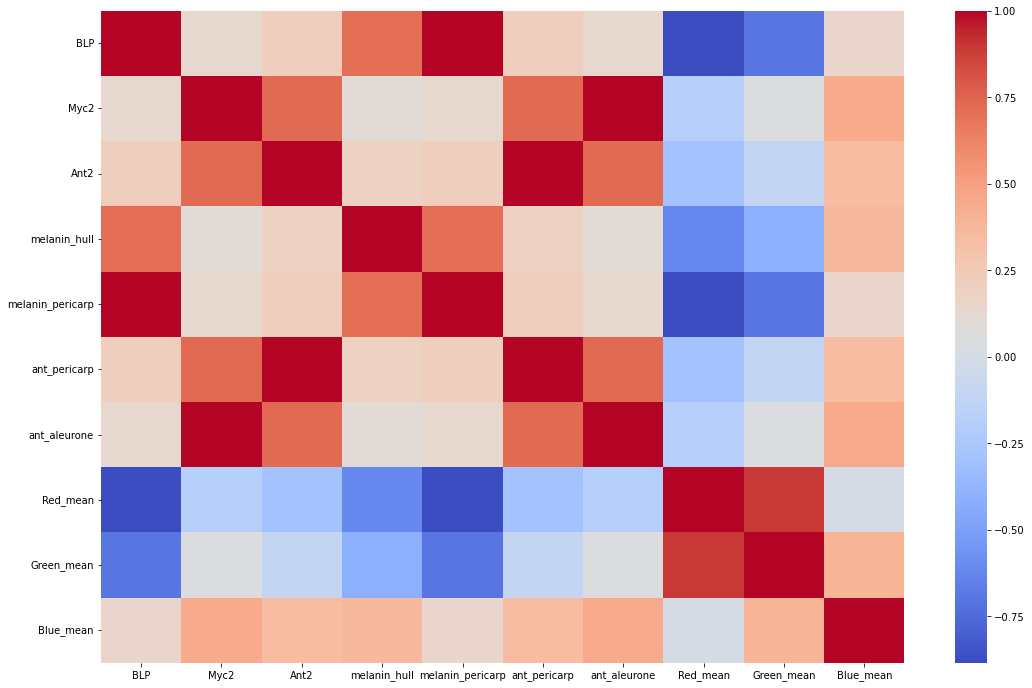

In [27]:
plt.figure(figsize = (18,12))
sns.heatmap(annot[['BLP','Myc2','Ant2','melanin_hull','melanin_pericarp','ant_pericarp','ant_aleurone','Red_mean','Green_mean','Blue_mean']].corr(method='pearson'), cmap = 'coolwarm')

## Иерархическая кластеризация

In [28]:
X = annot[['Red_mean','Green_mean','Blue_mean']] # убираем метки классов из наших данных
Y = annot.loc[:,'melanin_pericarp'] # выносим метки классов в отдельную переменную

In [29]:
lab = dict(zip(set(Y.values), ['#02B302', '#990000'])) 
row_colors = pd.DataFrame(Y.values)[0].map(lab)

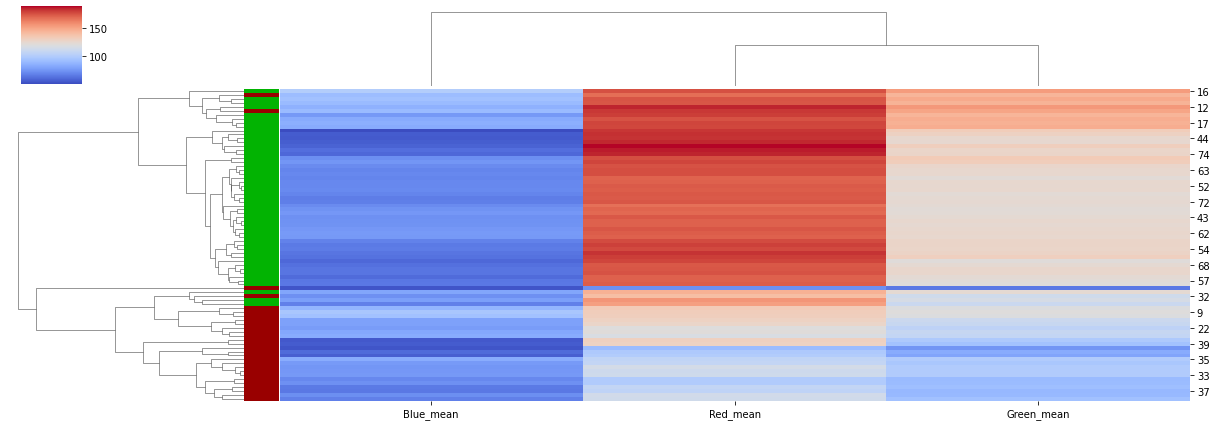

In [30]:
g = sns.clustermap(X, cmap='coolwarm', row_colors=[ row_colors ] , figsize = (17, 6)) #

## Графики

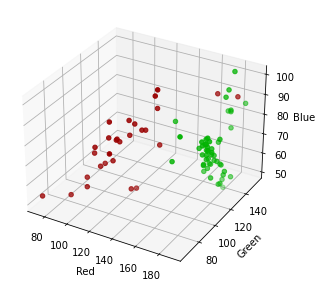

In [31]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')

x1 = annot[['Red_mean']]
y1 = annot[['Green_mean']]
z1 = annot[['Blue_mean']]

axes.scatter3D(x1, y1, z1, color = row_colors)

axes.set_xlabel('Red')
axes.set_ylabel('Green')
axes.set_zlabel('Blue')
plt.show()

## Снижение размеронсти данных

In [32]:
Y.replace(0, 'no', inplace=True)
Y.replace(1, 'yes', inplace=True)

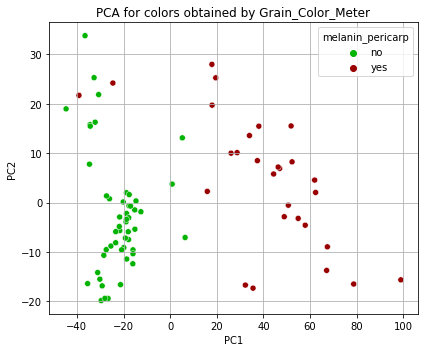

In [33]:
sklearn_pca = PCA(n_components=2) # инициализируем объект класса PCA и говорим ему оставить 2 ГК
sklearn_transf = pd.DataFrame(sklearn_pca.fit_transform(X), # проводим МГК стандартизованных данных
                              columns = ['PC1','PC2'])

# а теперь посмотрим на результаты PCA
fig, ax1 = plt.subplots(ncols=1, figsize=(6, 5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf, hue = Y, palette = ['#02B302', '#990000'], ax = ax1)

ax1.set_title('PCA for colors obtained by Grain_Color_Meter')
ax1.grid()

plt.tight_layout()
fig.savefig("PCA.png", dpi = 600)

D:\Programs\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Programs\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


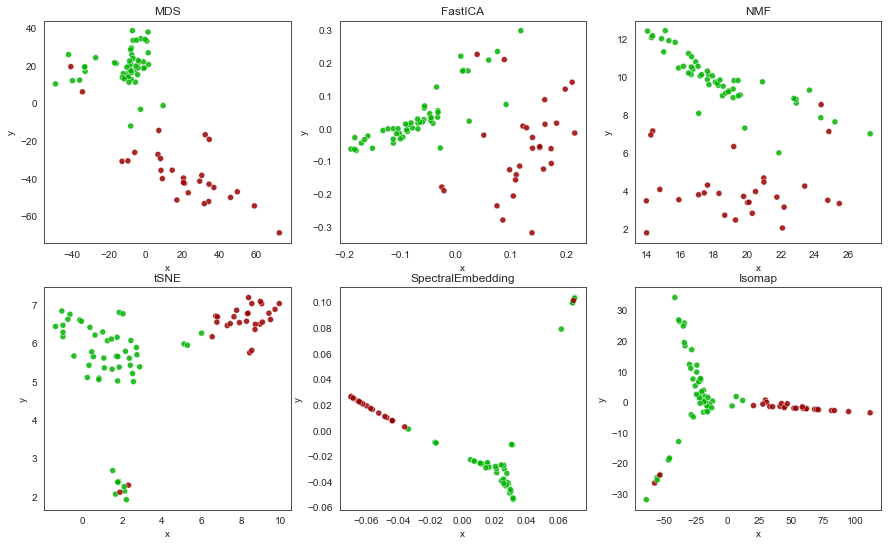

In [34]:
## Инициализируем объекты, реализующие выбранные нами методы снижения размерности
se = SpectralEmbedding(n_components=2, 
                       random_state=42, affinity='nearest_neighbors') # number of components to keep
iso = Isomap(n_components=2)
mds  = MDS(n_components=2, random_state=42) # number of components to keep
fica = FastICA(n_components=2, random_state=42) # number of components to keep
nmf  = NMF(n_components=2,  init='random', random_state=42) # number of components to keep
tsne = TSNE(n_components = 2, random_state = 42)

## Трансформируем данные с помощью выбранных алгоритмов
se_xstd  = pd.DataFrame(se.fit_transform(X), columns = ['x','y'])
iso_xstd  = pd.DataFrame(iso.fit_transform(X), columns = ['x','y'])
mds_xstd = pd.DataFrame(mds.fit_transform(X), columns = ['x','y'])
fica_xstd = pd.DataFrame(fica.fit_transform(X), columns = ['x','y'])
nmf_x = pd.DataFrame(nmf.fit_transform(X), columns = ['x','y']) ## Данные для NMF должны быть неотрицательны
tsne_x = pd.DataFrame(tsne.fit_transform(X), columns = ['x','y'])

## Рисуем графики
sns.set_style('white')
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 9))
g1 = sns.scatterplot(x = 'x', y = 'y', data = mds_xstd, ax = axes[0,0], 
                     hue = Y , palette = ['#02B302', '#990000'], legend = None, alpha = .85)
g2 = sns.scatterplot(x = 'x', y = 'y', data = fica_xstd, ax = axes[0,1], 
                     hue = Y , palette = ['#02B302', '#990000'], legend = None, alpha = .85)
g3 = sns.scatterplot(x = 'x', y = 'y', data = nmf_x, ax = axes[0,2], 
                     hue = Y , palette = ['#02B302', '#990000'], legend = None, alpha = .85)
g4 = sns.scatterplot(x = 'x', y = 'y', data = tsne_x, ax = axes[1,0], 
                     hue = Y , palette = ['#02B302', '#990000'], legend = None, alpha = .85)
g5 = sns.scatterplot(x = 'x', y = 'y', data = se_xstd, ax = axes[1,1], 
                     hue = Y , palette = ['#02B302', '#990000'], legend = None, alpha = .85)
g6 = sns.scatterplot(x = 'x', y = 'y', data = iso_xstd, ax = axes[1,2], 
                     hue = Y , palette = ['#02B302', '#990000'], legend = None, alpha = .85)
g1.set_title('MDS')
g2.set_title('FastICA')
g3.set_title('NMF')
g4.set_title('tSNE')
g5.set_title('SpectralEmbedding')
g6.set_title('Isomap');

## Кластеризация данных

In [35]:
def colorize (labs):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                  int(max(labs) + 1))))
    
    colors = np.append(colors, ["#000000"])
    return colors[labs]

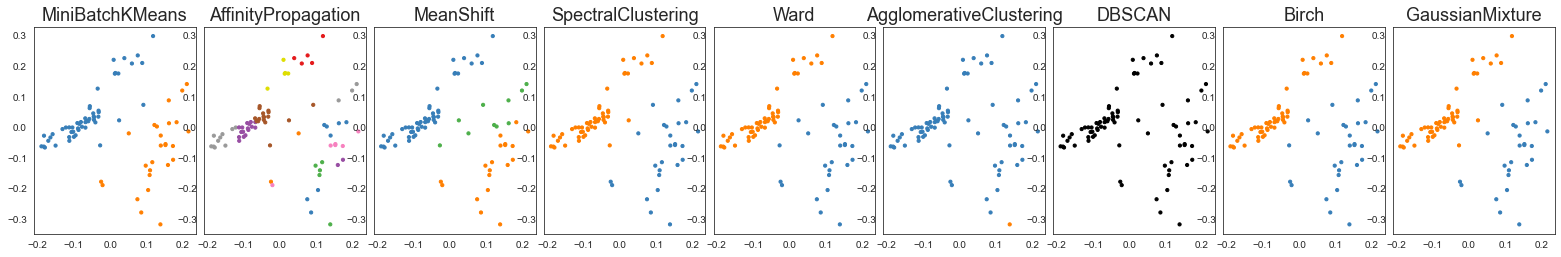

In [40]:
plt.figure(figsize=(22, 3))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1


# update parameters with dataset-specific values
default_base = {'quantile': .3, 'eps': .3, 'damping': .9, 'preference': -200, 'n_neighbors': 10, 'n_clusters': 2}
params = default_base.copy()
# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
# Create cluster objects
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])
average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock",
                                                  n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
clustering_algorithms = (('MiniBatchKMeans', two_means),('AffinityPropagation', affinity_propagation),
                         ('MeanShift', ms), ('SpectralClustering', spectral), ('Ward', ward),
                         ('AgglomerativeClustering', average_linkage), ('DBSCAN', dbscan),('Birch', birch),
                         ('GaussianMixture', gmm))

y_pred_dict = {}
for name, algorithm in clustering_algorithms:
    warnings.filterwarnings('ignore')
    algorithm.fit(X)

    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    y_pred_dict[name] = y_pred
        
    plt.subplot(1, len(clustering_algorithms), plot_num)

    plt.title(name, size=18)

    plt.scatter(fica_xstd['x'], fica_xstd['y'], s=10, color=colorize(y_pred))

    plot_num += 1

plt.show()

### Добавление кластеров в аннотацию

In [42]:
annot['Cluster'] = y_pred_dict['MiniBatchKMeans']

In [43]:
annot

,Sample_Number,Sample_Name,melanin_hull,melanin_pericarp,ant_pericarp,ant_aleurone,Nud,BLP,Myc2,Ant2,Color_Raw,Red_mean,Green_mean,Blue_mean,Red_std,Green_std,Blue_std,pigments,Cluster
0,01,Rec,0,no,0,0,yes,0,0,0,"[[181, 132, 49], [180, 131, 49], [181, 131, 49...",182.222222,132.777778,50.444444,1.396645,1.474055,1.571348,None,0
1,02,BLP-h,1,yes,0,0,no,1,0,0,"[[122, 109, 82], [122, 109, 82], [121, 109, 82...",121.444444,108.555556,81.777778,1.706921,1.165343,0.628539,Melanins,1
2,03,BLP-n,0,yes,0,0,yes,1,0,0,"[[131, 98, 54], [133, 101, 58], [132, 100, 56]...",130.555556,98.222222,54.555556,1.949992,1.749780,1.571348,Melanins,1
3,04,Bowman,0,no,0,0,no,0,0,0,"[[174, 138, 73], [181, 146, 77], [188, 154, 84...",180.333333,144.222222,76.444444,4.594683,5.632796,5.519885,None,0
4,05,BA,0,no,0,1,yes,0,1,0,"[[150, 128, 83], [152, 130, 85], [149, 126, 82...",145.666667,124.222222,81.333333,3.527668,2.739740,1.825742,Anthocyanins,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Wh_34,Dagestanskii,0,no,0,0,no,0,0,0,"[[192, 135, 65], [178, 122, 59], [190, 131, 59...",185.444444,127.666667,59.444444,6.584681,4.690416,2.793290,None,0
75,Wh_35,Krasnoyarskii_1,0,no,0,0,no,0,0,0,"[[173, 123, 69], [170, 120, 66], [180, 132, 75...",175.666667,126.777778,71.444444,2.943920,3.705185,3.095197,None,0
76,Wh_36,Talan,0,no,0,0,no,0,0,0,"[[182, 136, 78], [182, 135, 77], [174, 127, 71...",179.000000,132.000000,74.888889,4.082483,4.876246,3.348115,None,0
77,Wh_37,Aley,0,no,0,0,no,0,0,0,"[[177, 128, 68], [180, 132, 71], [175, 124, 63...",177.222222,127.666667,68.000000,3.325918,4.242641,3.651484,None,0


### Анализ кластеров

In [44]:
annot[['BLP','Myc2','Ant2','melanin_hull','melanin_pericarp','ant_pericarp','ant_aleurone','Red_mean','Green_mean','Blue_mean','Cluster']].corr(method='pearson')

,BLP,Myc2,Ant2,melanin_hull,ant_pericarp,ant_aleurone,Red_mean,Green_mean,Blue_mean,Cluster
BLP,1.000000,0.127157,0.219211,0.706699,0.219211,0.127157,-0.885254,-0.707420,0.146309,0.945268
Myc2,0.127157,1.000000,0.732481,0.100569,0.732481,1.000000,-0.190341,0.046785,0.440719,0.157655
Ant2,0.219211,0.732481,1.000000,0.195975,1.000000,0.732481,-0.289292,-0.110609,0.348478,0.250304
melanin_hull,0.706699,0.100569,0.195975,1.000000,0.195975,0.100569,-0.620303,-0.407671,0.365409,0.747618
ant_pericarp,0.219211,0.732481,1.000000,0.195975,1.000000,0.732481,-0.289292,-0.110609,0.348478,0.250304
ant_aleurone,0.127157,1.000000,0.732481,0.100569,0.732481,1.000000,-0.190341,0.046785,0.440719,0.157655
Red_mean,-0.885254,-0.190341,-0.289292,-0.620303,-0.289292,-0.190341,1.000000,0.891402,-0.001218,-0.936108
Green_mean,-0.707420,0.046785,-0.110609,-0.407671,-0.110609,0.046785,0.891402,1.000000,0.393828,-0.801567
Blue_mean,0.146309,0.440719,0.348478,0.365409,0.348478,0.440719,-0.001218,0.393828,1.000000,0.054497
Cluster,0.945268,0.157655,0.250304,0.747618,0.250304,0.157655,-0.936108,-0.801567,0.054497,1.000000


<AxesSubplot:>

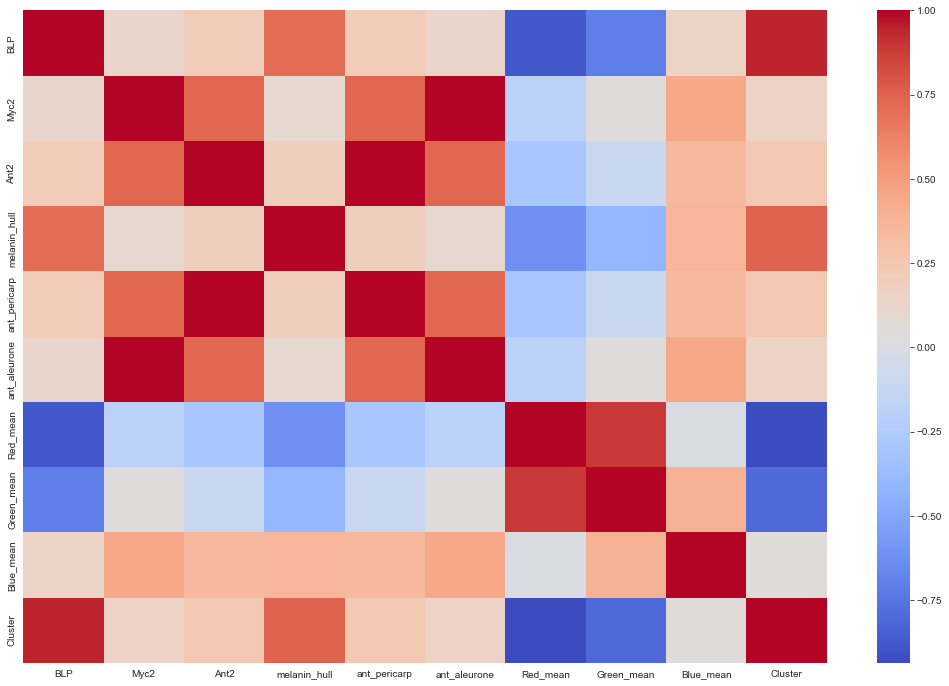

In [45]:
plt.figure(figsize = (18,12))
sns.heatmap(annot[['BLP','Myc2','Ant2','melanin_hull','melanin_pericarp','ant_pericarp','ant_aleurone','Red_mean','Green_mean','Blue_mean','Cluster']].corr(method='pearson'), cmap = 'coolwarm')

### Анализ выбросов

In [46]:
annot[(annot['Cluster'] == 0) & (annot['BLP'] == 1)]

,Sample_Number,Sample_Name,melanin_hull,melanin_pericarp,ant_pericarp,ant_aleurone,Nud,BLP,Myc2,Ant2,Color_Raw,Red_mean,Green_mean,Blue_mean,Red_std,Green_std,Blue_std,pigments,Cluster
7,08,gBLP,0,yes,0,0,no,1,0,0,"[[163, 137, 83], [184, 159, 101], [161, 137, 8...",168.111111,144.222222,91.666667,6.707284,8.991079,14.149990,Melanins,0
40,41,VIR144,0,yes,0,0,no,1,0,0,"[[180, 151, 89], [179, 147, 89], [175, 143, 85...",181.444444,150.333333,90.111111,6.897844,5.228129,4.228066,Melanins,0
